<a href="https://colab.research.google.com/github/canerborekci/CarPrediction/blob/main/car_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Kütüphaneleri ve modelleri import ediyoruz. Daha sonra bir çok modeli sırasıyla deneyen fonksiyon ile model skorları çıkaracağız.
# Bu yüzden çok fazla modeli import ediyoruz.
import numpy as np
import pandas as pd
import seaborn as sns
import io
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn import neighbors
from sklearn.svm import SVR
from warnings import filterwarnings
filterwarnings('ignore')
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn import model_selection 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
#Veri setimizi tanıttık.
uploaded = files.upload()        
df=pd.read_csv(io.BytesIO(uploaded['turkey_car_market.csv']))

Saving turkey_car_market.csv to turkey_car_market.csv


In [ ]:
#Veri Setimiz ve içerikleri
df.head()

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
0,27/05/2020,Jaguar,XF,2.0 D Prestige Plus,2017.0,Dizel,Otomatik Vites,1801-2000 cc,176-200 BG,Lacivert,Hatchback 5 Kapı,Galeriden,2. El,26100,634500
1,16/06/2020,Acura,CL,-,2015.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,101-125 BG,Mavi,Sedan,Sahibinden,2. El,127000,151500
2,14/06/2020,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Turkuaz,Sedan,Sahibinden,2. El,175000,19750
3,11/06/2020,Acura,CL,-,2013.0,Dizel,Düz Vites,1301-1600 cc,76-100 BG,Kahverengi,Sedan,Sahibinden,2. El,325,52000
4,11/06/2020,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801-2000 cc,151-175 BG,Beyaz,Sedan,Sahibinden,2. El,207000,148750


In [ ]:
#Veri tipleri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9044 entries, 0 to 9043
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   İlan Tarihi     9044 non-null   object 
 1   Marka           9044 non-null   object 
 2   Arac Tip Grubu  9044 non-null   object 
 3   Arac Tip        9044 non-null   object 
 4   Model Yıl       9044 non-null   float64
 5   Yakıt Turu      9044 non-null   object 
 6   Vites           9044 non-null   object 
 7   CCM             9044 non-null   object 
 8   Beygir Gucu     9044 non-null   object 
 9   Renk            9044 non-null   object 
 10  Kasa Tipi       9044 non-null   object 
 11  Kimden          9044 non-null   object 
 12  Durum           9044 non-null   object 
 13  Km              9044 non-null   int64  
 14  Fiyat           9044 non-null   int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 1.0+ MB


In [ ]:
#Verimizi Görselleştirelim #BAŞLIK BURASI

In [ ]:
#Python ile veri görselleştirmesi yaparken genel olarak kullanılan kütüphane matplot.lib kütüphanesidir.
# Bu kütüphane üzerine inşa edilmiş seaborn kütüphanesi,
# matplot.lib kütüphanesine high level interface (daha okunur olma) sunar.
#Dolayısıyla daha az kod ile istediğimiz istatiksel grafikleri çok daha kolay bir şekilde elde edebiliriz.


In [ ]:
#Neden seaborn ?

#Seaborn çok güzel görselleştirmeleri çok kısa kodlarla yapmanıza olanak sağlar.Daha az çaba,daha güzel görselleştirme!
#Özel olarak renk paleti belirleme özelliği sağlar.
#İstatistiksel analizler için optimize edilmiştir.

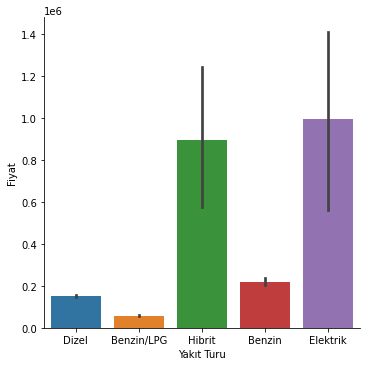

In [ ]:
#1- Yakıt Türüne Göre Araç Fiyatlarına bakalım
sns.catplot(x="Yakıt Turu", y="Fiyat", kind="bar", data=df);

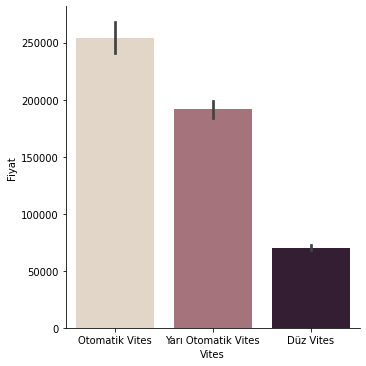

In [ ]:
#2-Vites Türüne Göre Araç Fiyatları
sns.catplot(x="Vites", y="Fiyat", kind="bar", data=df, palette="ch:.25");

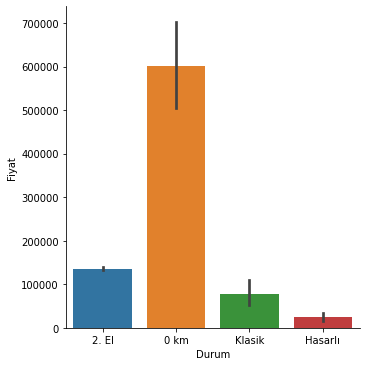

In [ ]:
#3- Araç Durumuna Göre Fiyatlar
sns.catplot(x="Durum", y="Fiyat", kind="bar", data=df);

#Görüldüğü üzere 0 km araçların fiyatlarında çok büyük bir fark var. #BU YORUMU ALTTAKİ GRAFİĞİN ALTINA YAZARSIN

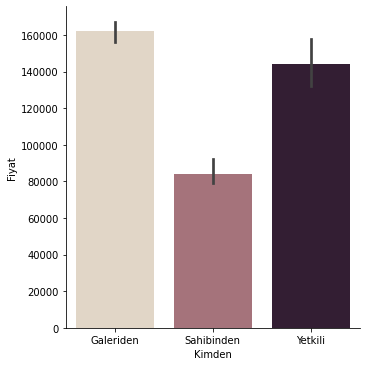

In [ ]:
#Bir de satıcıya göre fiyatları inceleyelim
sns.catplot(x="Kimden", y="Fiyat", kind="bar", data=df, palette="ch:.25");

In [ ]:
 #Kolonları inceleyelim #BAŞLIK

# Kolonlarlardaki benzersiz kaç kategorik veri var bunları inceleyeceğiz
print(len(df['Marka'].unique()))               
markalar=df['Marka'].unique()
print(markalar)

36
['Jaguar' 'Acura' 'Jeep' 'Hyundai' 'Alfa Romeo' 'Audi' 'Mercedes'
 'Volkswagen' 'Land Rover' 'BMW' 'Dacia' 'Renault' 'Peugeot' 'Chevrolet'
 'Chery' 'Citroen' 'Chrysler' 'Fiat' 'Ford' 'Honda' 'Geely' 'Infiniti'
 'Isuzu' 'Kia' 'Lada' 'Maserati' 'Mazda' 'Mini' 'Mitsubishi' 'Nissan'
 'Opel' 'Porsche' 'Rover' 'Seat' 'Skoda' 'Tofaş']


In [ ]:
#" - " ile tanımlanmış bir araç tipi var. Bu modelimiz için uygun bir veri değil. Bu yüzden tahminlemeyi daha iyi yapmak için bu verileri çıkaracağız.
print(len(df['Arac Tip'].unique()))
car_type=df['Arac Tip'].unique()
print(car_type)

1759
['2.0 D Prestige Plus' '-' '2.2' ... 'SLX ie' 'SL' 'L']


In [ ]:
len(df[df['Arac Tip']=='-'])  

55

In [ ]:
print(len(df['Yakıt Turu'].unique()))
yakıt_type=df['Yakıt Turu'].unique()
yakıt_type

5


array(['Dizel', 'Benzin/LPG', 'Hibrit', 'Benzin', 'Elektrik'],
      dtype=object)

In [ ]:
print(len(df['Vites'].unique()))
vites_type=df['Vites'].unique()
vites_type

3


array(['Otomatik Vites', 'Yarı Otomatik Vites', 'Düz Vites'], dtype=object)

In [ ]:
#'Araç Tipi Kolonunda olduğu gibi Beygir Gücü ve CCM kolonlarında da uygun olmayan veriler mevcut. Bunlarında sayısını görüyoruz
print('Farklı CCM değer sayısı : ', len(df['CCM'].unique()),'\n')
CCM_type=df['CCM'].unique()
print(CCM_type,'\n')
print('Bilmiyorum değeri girilmiş CCM sayısı : ', len(df[df['CCM']=='Bilmiyorum']))

Farklı CCM değer sayısı :  15 

['1801-2000 cc' '1301-1600 cc' '1601-1800 cc' '1300 cc ve altı'
 '2501-3000 cc' 'Bilmiyorum' '2001-2500 cc' '3501-4000 cc' '3001-3500 cc'
 '4001-4500 cc' '-' '6001 cc ve üzeri' '5501-6000 cc' '5001-5500 cc'
 '4501-5000 cc'] 

Bilmiyorum değeri girilmiş CCM sayısı :  108


In [ ]:
#'bilmiyorum' değeri burda tahminlemeyi etkileyeceği için data setten o ilanları kaldıracağız
print('Farklı Beygir gucu değer sayısı : ', len(df['Beygir Gucu'].unique()),'\n')
power=df['Beygir Gucu'].unique()
print(power,'\n')
print('Bilmiyorum değeri girilmiş Beygir Gucu sayısı : ', len(df[df['Beygir Gucu']=='Bilmiyorum']))

Farklı Beygir gucu değer sayısı :  19 

['176-200 BG' '101-125 BG' '76-100 BG' '151-175 BG' '100 BG ve altı'
 '201-225 BG' '126-150 BG' 'Bilmiyorum' '276-300 BG' '226-250 BG'
 '251-275 BG' '301-325 BG' '326-350 BG' '376-400 BG' '51-75 BG' '-'
 '601 BG ve üzeri' '50 BG ve altı' '451-475 BG'] 

Bilmiyorum değeri girilmiş Beygir Gucu sayısı :  5549


In [ ]:
#modelin yılı yerine yaşı ile işlem yapıcağız
df['car_age']=2020-df['Model Yıl']     
df['car_age'].head()

0     3.0
1     5.0
2    26.0
3     7.0
4    10.0
Name: car_age, dtype: float64

In [ ]:
 #Yaş değişkenini oluşturduğumuz için Model Yılını artık silebiliriz. 
 #Bütün araçlarında aynı yıl içinde ilan verildiğini düşünürsek işlem kolaylığı açısından İlan tarihinide silebiliriz
df.drop(['Model Yıl'], axis=1,inplace=True)   
df.drop(['İlan Tarihi'],axis=1,inplace=True)
df.columns

Index(['Marka', 'Arac Tip Grubu', 'Arac Tip', 'Yakıt Turu', 'Vites', 'CCM',
       'Beygir Gucu', 'Renk', 'Kasa Tipi', 'Kimden', 'Durum', 'Km', 'Fiyat',
       'car_age'],
      dtype='object')

In [ ]:
#Uygun olmayan Verileri Temizleme #BAŞLIK


# Bir makine öğrenimi algoritması, yalnızca içine beslenen veriler kadar iyidir.
#Bu nedenle, verilerinizi algoritmalarınıza beslemeden önce temizlemeniz çok önemlidir.

In [ ]:

#Öncelikle araç tipindeki '-' ile girilmiş verileri düzenleyeceğiz. Bu şekilde az sayıda veri var. Ancak bu kolonda çeşitlilik çok fazla olduğundan dolayı bu verileri silmek yerine 'diğer' adlı bir değişkene atacağız.
df['Arac Tip']=df['Arac Tip'].str.replace('-','Diger')
len(df[df['Arac Tip']=='Diger'])

55

In [ ]:
#CCM kolonunda da 'Bilmiyorum' değeri girilmiş 108 tane verimiz bulunuyordu. 
#Datasetimizin büyüklüğün düşünürsek bu değerleri silmek modelimizi çok fazla etkilemeyecektir.
# Çeşitlilik az olduğundan dolayı doldurma işlemide yapmamız modelimizin başka tarafa kaymasına sebep olabilir.

CCM_drop=df[df['CCM']=='Bilmiyorum'].index
df.drop(CCM_drop,axis=0,inplace=True)

In [ ]:
#Verilerimizi temizledikten sonra kalan satır ve sütun sayısı.
df.shape


(8936, 15)

In [ ]:
#Veri Önişleme 


#Veri ön işleme; veri madenciliği modelleri kurulmadan önce veri seti üzerinde yapılan bir takım düzeltme,
# eksik veriyi tamamlama, tekrarlanan verileri kaldırma, dönüştürme, bütünleştirme, temizleme, normalleştirme,
# boyut indirgeme vb. işlemlerdir. Bu aşamada ister istemez veri üzerinde bilgi keşfi yapılmış olur.


In [ ]:
#Label Encoder 

#Veriyi birebir sayısallaştırmaya yarar. Yani kategorik her veriye sayısal bir değer atar.
#İlk önce Araba Markalarını sayısal forma döndürüp daha sonra hangi sayının hangi modele denk geldiğini tablo şeklinde gösteriyoruz.
l_encoder1=LabelEncoder()
df['Marka']=l_encoder1.fit_transform(df['Marka'])

In [ ]:
cars={}
car_name = list(l_encoder1.inverse_transform([i for i in range(35)]))
for i,x in enumerate(car_name):
  if i not in cars.keys():
    cars[i] =x

In [ ]:
pd.DataFrame(cars.items(), columns=['label_values', 'car_name']).head()

,label_values,car_name
0,0,Acura
1,1,Alfa Romeo
2,2,Audi
3,3,BMW
4,4,Chevrolet


In [ ]:
#Kalan Diğer Değişkenlerede Label Encoder işlemini uyguluyoruz
l_encoder = LabelEncoder()
columns = ['Arac Tip Grubu', 'Arac Tip','Yakıt Turu', 'Vites', 'CCM', 'Beygir Gucu', 'Renk', 'Kasa Tipi','Kimden', 'Durum']
for i in columns:
  df[i]=l_encoder.fit_transform(df[i])

In [ ]:
#Verileri sayısal değere atadık.
df.head()

,Marka,Arac Tip Grubu,Arac Tip,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat,car_age
0,15,374,1082,2,1,4,5,17,5,0,1,26100,634500,3.0
1,0,126,1612,2,2,2,2,18,9,1,1,127000,151500,5.0
2,0,126,1171,1,0,2,2,23,9,1,1,175000,19750,26.0
3,0,126,1612,2,0,2,17,13,9,1,1,325,52000,7.0
4,0,126,1171,2,1,4,4,4,9,1,1,207000,148750,10.0


In [ ]:
#Aykırı değerler 

#Aykırı değerler, analiz sonuçlarımızı ve istatistiksel modellemeyi ciddi şekilde etkileyebilir.
#Elimizdeki verileri makine öğrenmesine hazır hale getirmek için belli ön işleme metotları uygulamalıyız.
# Bu metotlardan biride aykırı değerlerin analizidir.
# Aykırı değer, bir veri setindeki gözlemlerin geri kalanından büyük ölçüde farklı olan herhangi bir veri noktasıdır.
# Diğer bir tanımla genel eğilimin oldukça dışına çıkan gözlemdir.

In [ ]:

#Aykırı (outline) değerleri bulup analiz etmek amacıyla öncelikle Kartiller yani çeyreklik açıklıkları tespit etmemiz gerekmektedir. 
q1 = df["Fiyat"].quantile(0.25)
q3 = df["Fiyat"].quantile(0.75)      

IOC = q3 - q1

alt_sınır = q1 - 1.5*IOC
üst_sınır = q3 + 1.5*IOC

sınır = (df["Fiyat"] < alt_sınır) | (df["Fiyat"] > üst_sınır)
df["Aykırı_Deger"] = sınır
print('Aykırı Değer Sayısı =>\n',df["Aykırı_Deger"].value_counts())
df = df.loc[df["Aykırı_Deger"] == False]
del df["Aykırı_Deger"]

Aykırı Değer Sayısı =>
 False    8189
True      747
Name: Aykırı_Deger, dtype: int64


In [ ]:

y=df['Fiyat']
x=df.drop(['Fiyat'],axis=1)

In [ ]:
#Herhangi bir makine öğrenmesi algoritmasını çalıştırmak için veriyi train ve test gruplarına ayırmak gerekmektedir.
# Burada X, tahmin grubunu ve y kontrol grubunu oluşturuyor. 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
x_train.head()

,Marka,Arac Tip Grubu,Arac Tip,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,car_age
4243,19,192,1746,0,2,4,7.0,4,0,0,1,76000,7.0
2447,9,190,888,2,0,7,17.0,4,9,0,1,130000,5.0
2332,8,255,553,1,0,2,2.0,11,9,1,1,216000,16.0
3417,12,382,59,1,0,1,15.0,11,5,1,1,111000,9.0
539,3,41,1304,0,1,3,3.0,9,9,0,1,50000,5.0


In [ ]:
#Eğitim ve test gruplarını standardize hale getirmek gerekiyor. Standart ölçeğe dönüştürmek, 
#bir çok tahminleme algoritmasına verinin yerleştirilebilmesini sağlayacaktır. 
#Bir sonraki adım olan algoritmaların karşılaştırılmasını en az hatayla yapılmasına da imkan verecektir.

sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [ ]:
#Her bir algoritma için x ve y eğitim gruplarını yerleştirilip, tahminleme yapılmaktadır. 
#RMSE yani Ortalama hata kareleri toplamı kökü (hata ölçeği) hesaplanmaktadır. 
#Modelin skor ve ismi tek tek her bir algoritma için hesaplanmaktadır. 
modeller=[]
scores=[]
def compML(alg,x_train,y_train,x_test,y_test):
    model=alg().fit(x_train,y_train)
    y_pred=model.predict(x_test)
    RMSE= np.sqrt(mean_squared_error(y_test,y_pred))
    model_ismi= alg.__name__
    model_score = model.score(x_test,y_test)
    scores.append(model_score*100 if model_score > 0 else 0)
    modeller.append(model_ismi)
    print(model_ismi ," Modeli Test Hatası => ", RMSE,' |  Model Score => ', model_score*100)

models=[LGBMRegressor, Lasso,
        XGBRegressor, LinearRegression,
        GradientBoostingRegressor,
        RandomForestRegressor, ElasticNet,
        DecisionTreeRegressor, Ridge,
        MLPRegressor,
        KNeighborsRegressor, 
        SVR]

for i in models:
    compML(i,x_train,y_train,x_test,y_test) 

LGBMRegressor  Modeli Test Hatası =>  14831.18488609659  |  Model Score =>  93.9174304981272
Lasso  Modeli Test Hatası =>  35395.81300803671  |  Model Score =>  65.35511161271837
[20:12:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor  Modeli Test Hatası =>  20481.764326106415  |  Model Score =>  88.39967620847757
LinearRegression  Modeli Test Hatası =>  35395.83346156064  |  Model Score =>  65.3550715735048
GradientBoostingRegressor  Modeli Test Hatası =>  20503.133059996024  |  Model Score =>  88.37545822240412
RandomForestRegressor  Modeli Test Hatası =>  15997.670971349253  |  Model Score =>  92.92300476985518
ElasticNet  Modeli Test Hatası =>  37556.190703509055  |  Model Score =>  60.99696042757766
DecisionTreeRegressor  Modeli Test Hatası =>  22549.680382499202  |  Model Score =>  85.93900144786268
Ridge  Modeli Test Hatası =>  35395.75611704878  |  Model Score =>  65.35522298071224
MLPRegressor 

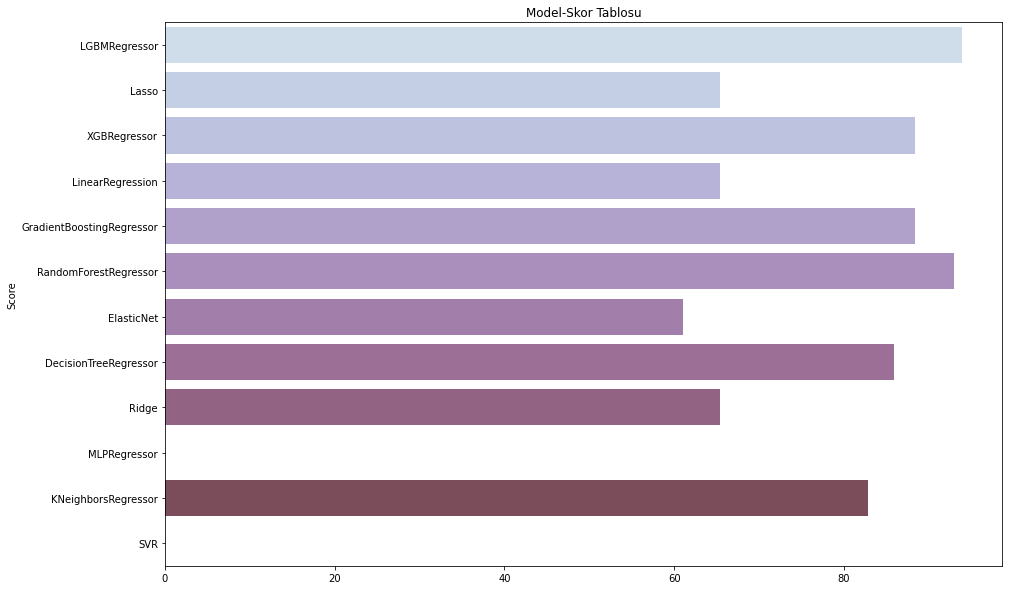

In [ ]:
#Model skorları içinde en iyi sonucu (skoru) LightGBM Algoritması vermektedir.

plt.figure(figsize=(15,10))
ax = sns.barplot(x=scores, y=modeller, palette="ch:4.5,-.7,dark=.3")
ax.set_title("Model-Skor Tablosu")
ax.set_ylabel("Modeller")
ax.set_ylabel("Score")
plt.show()

In [ ]:
#LightGBM 

#Standart karar ağacı algoritmalarına kıyasla LightGBM, yaprak odaklı büyüme metodunu kullanır.
#Seviye odaklı stratejide ağaç büyürken ağacın dengesi korunur. Yaprak odaklı stratejide ise kaybı azaltan yapraklardan bölünme işlemi devam eder.
#LightGBM bu özelliği sayesinde diğer boosting algoritmalarından ayrılmaktadır.
#Model yaprak odaklı strateji ile daha az hata oranına sahip olur ve daha hızlı öğrenir.
#Ancak yaprak odaklı büyüme stratejisi veri sayısının az olduğu durumlarda modelin aşırı öğrenmeye
#yatkın olmasına sebebiyet verir. Bu nedenle algoritma büyük verilerde kullanılmak için daha uygundur.
#  Ayrıca ağaç derinliği, yaprak sayısı gibi parametreler optimize edilip aşırı öğrenmenin önüne geçmeye çalışılabilir.

In [ ]:
lgbm=LGBMRegressor()     
lgbm.fit(x_train,y_train)

lgbm_pred = lgbm.predict(x_test)

model_score = lgbm.score(x_test,y_test)
r2_skor = r2_score(y_test, lgbm_pred)
hata_skor = np.sqrt(mean_squared_error(y_test, lgbm_pred))
ev = metrics.explained_variance_score(y_test, lgbm_pred)

print("Model Score: ", model_score*100)
print("R2_skoru: ", r2_skor)
print("Hata Kare: ", hata_skor)
print("Explained Variance : ", ev)

Model Score:  93.9174304981272
R2_skoru:  0.9391743049812722
Hata Kare:  14831.18488609659
Explained Variance :  0.9391743241100291


In [ ]:
#Modelimizi uyguluyoruz. Burada bizi LGBM içerisinde yer alan bazı parametreler karşılıyor.
# Kütüphane içerisinden bir metod çağırarak en uygun değerleri buluyoruz. 
lgbm_params={'learning_rate':[0.01, 0.1, 0.5],   
            'n_estimators':[200,500,1000],
            'max_depth':[5, 7, 10],
             'colsample_bytree':[0.7, 0.9, 1.0],
             'subsample': [0.4, 0.5, 0.6, 0.7]
             }
lgbm_cv_model=GridSearchCV(lgbm,lgbm_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 30.8min finished


In [ ]:

lgbm_cv_model.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 500,
 'subsample': 0.4}

In [ ]:
#Tüm parametreleri modele atadıktan sonra skoru, r2, hata ve düzeltilmiş r2 değerlerini almak üzere modeli çalıştırıyoruz.
lgbm_tuned=LGBMRegressor(learning_rate = lgbm_cv_model.best_params_['learning_rate'],
                        max_depth = lgbm_cv_model.best_params_['max_depth'],
                        n_estimators = lgbm_cv_model.best_params_['n_estimators'],
                        colsample_bytree = lgbm_cv_model.best_params_['colsample_bytree'],
                        subsample=lgbm_cv_model.best_params_['subsample']).fit(x_train,y_train)

y_pred=lgbm_tuned.predict(x_test)

model_score = lgbm_tuned.score(x_test,y_test)
r2_skor = r2_score(y_test, y_pred)
hata_skor = np.sqrt(mean_squared_error(y_test, y_pred))
adjusted_r2_skor = 1 - (1-r2_skor)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
ev = metrics.explained_variance_score(y_test, y_pred)

print("Model scoru : ", model_score*100)
print("R2_skoru: ", r2_skor)
print("Hata Kare: ", hata_skor)
print("Adjusted_R2_skoru : ", adjusted_r2_skor)
print("Explained Variance : ", ev)


Model scoru :  94.72769638319976
R2_skoru:  0.9472769638319976
Hata Kare:  13808.05521076068
Adjusted_R2_skoru :  0.9468549198232635
Explained Variance :  0.9472886515936138


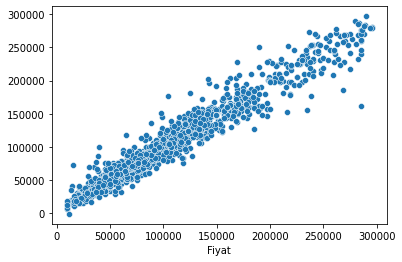

In [ ]:
#tahminler ve gerçek değerler arasındaki ilişkiyi görselleştirelim


sns.scatterplot(x=y_test,y=y_pred)

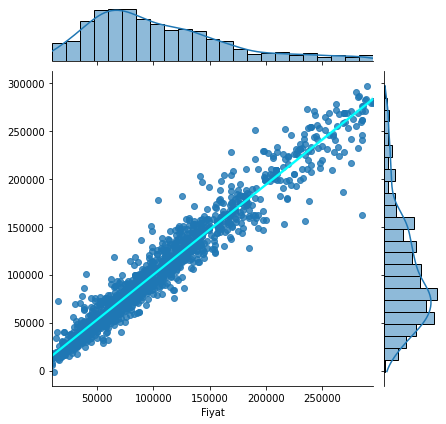

In [ ]:
#Burada regresyon eğrimizin ve verilerimizin eğri üzerindeki dağılımlarını görebiliriz. 
#Aynı şekilde tahminler ve gerçek değerlerin fiyat bazında değişimlerini de üst ve sağ kolonlardaki histogramlardan takip edebiliriz. 
sns.jointplot(x=y_test, y=y_pred,  kind='reg',
                  joint_kws={'line_kws':{'color':'cyan'}})

In [ ]:
#tahminleri değişkene atıyoruz
real_pred = pd.DataFrame({'Gerçek Fiyat': np.array(y_test).flatten(), 'Tahmini Fiyat': y_pred.flatten(),'Fark':np.array(y_test).flatten()-y_pred.flatten()})
real_pred.Fark=round(real_pred.Fark)


,Gerçek Fiyat,Tahmini Fiyat,Fark
0,60000,53726.354250,6274.0
1,79750,83099.037386,-3349.0
2,64000,67548.646150,-3549.0
3,55900,56456.296692,-556.0
4,79000,57827.140995,21173.0
5,44500,39282.070928,5218.0
6,197000,156586.266330,40414.0
7,57500,48863.425295,8637.0
8,76000,75784.045810,216.0
9,134750,135379.135138,-629.0


In [ ]:
#Tahminleri veri setimiz ile birleştirdik.
result = pd.concat([df, real_pred], axis=1, join="inner")

In [ ]:
tahmin=result.head()

In [ ]:
#Tahminleme işlemini göstermeden önce tablomuzdaki sayısal değerleri kategorik formatlara dönüştürüyoruz.

In [ ]:
tahmin['Arac Tip Grubu'] = tahmin['Arac Tip Grubu'].map({126:'CL',306:'RSX',359:'Tucson',209:'Giulietta',11:'147',263:'Mito',167:'Giulietta'})

In [ ]:
tahmin['Yakıt Turu'] = tahmin['Yakıt Turu'].map({2:'Dizel',1:'Benzin/LPG',4:'Hibrit'})


In [ ]:
tahmin['Vites'] = tahmin['Vites'].map({0:'Düz Vites',1:'Otomatik Vites',2:'Yarı Otomatik Vites'})


In [ ]:
tahmin['CCM'] = tahmin['CCM'].map({4:'1801-2000 cc',1:'1300 cc ve altı',2:'1301-1600 cc',3:'1601-1800 cc'})

In [ ]:
tahmin['Beygir Gucu'] = tahmin['Beygir Gucu'].map({2.0:'101-125 BG',17.0:'76-100 BG',4.0:'151-175 BG',1.0:'100 BG ve altı'})


In [ ]:
tahmin['Renk'] = tahmin['Renk'].map({18:'Mavi',23:'Turkuaz',13:'Kahverengi',4:'Beyaz',17:'Lacivert',16:'Kırmızı',9:'Gri',22:'Siyah'})

In [ ]:
tahmin['Kasa Tipi'] = tahmin['Kasa Tipi'].map({9:'Sedan',8:'Roadster',5:'Hatchback 5 Kapı'})


In [ ]:
tahmin['Kimden'] = tahmin['Kimden'].map({1:'Sahibinden',0:'Galeriden',2:'Yetkili'})

In [ ]:
tahmin['Durum'] = tahmin['Durum'].map({1:'2. El',0:'0 KM'})

In [ ]:
#Tahminleme yapıldıktan sonraki sonuç tablosu.
tahmin.head(10)

,Marka,Arac Tip Grubu,Arac Tip,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat,car_age,Gerçek Fiyat,Tahmini Fiyat,Fark
1,Acura,CL,-,Dizel,Yarı Otomatik Vites,1301-1600 cc,101-125 BG,Mavi,Sedan,Sahibinden,2. El,127000,151500,5.0,79750,83099.037386,-3349.0
2,Acura,CL,2.2,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Turkuaz,Sedan,Sahibinden,2. El,175000,19750,26.0,64000,67548.646150,-3549.0
3,Acura,CL,-,Dizel,Düz Vites,1301-1600 cc,76-100 BG,Kahverengi,Sedan,Sahibinden,2. El,325,52000,7.0,55900,56456.296692,-556.0
4,Acura,CL,2.2,Dizel,Otomatik Vites,1801-2000 cc,151-175 BG,Beyaz,Sedan,Sahibinden,2. El,207000,148750,10.0,79000,57827.140995,21173.0
5,Acura,CL,2.2,Dizel,Düz Vites,1801-2000 cc,101-125 BG,Lacivert,Roadster,Galeriden,2. El,320000,42500,21.0,44500,39282.070928,5218.0
6,Acura,CL,2.2,Dizel,Otomatik Vites,1301-1600 cc,101-125 BG,Kırmızı,Sedan,Galeriden,2. El,183,170000,6.0,197000,156586.266330,40414.0
7,Acura,CL,-,Dizel,Düz Vites,1301-1600 cc,76-100 BG,Beyaz,Hatchback 5 Kapı,Sahibinden,2. El,79000,82500,6.0,57500,48863.425295,8637.0
8,Acura,RSX,Type-S,Hibrit,Otomatik Vites,1601-1800 cc,100 BG ve altı,Beyaz,Sedan,Yetkili,0 KM,15662,189000,1.0,76000,75784.045810,216.0
9,Acura,RSX,Type-S,Hibrit,Otomatik Vites,1601-1800 cc,100 BG ve altı,Gri,Sedan,Yetkili,0 KM,31971,189000,1.0,134750,135379.135138,-629.0
10,Acura,CL,-,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Siyah,Hatchback 5 Kapı,Sahibinden,2. El,252000,36750,19.0,149000,148209.083743,791.0
